# **Part E: Model Building and Training**
A **CNN-LSTM and attention** based hybrid model is formulated. 

### Instaling Optuna & MLflow

In [1]:
!pip install optuna-integration[mlflow]
!pip install 


^C


ERROR: You must give at least one requirement to install (see "pip help install")


### **1. Importing Libraries**


In [5]:
!pip install tensorflow==2.16.1 tensorboard==2.16.2 packaging==24.1 werkzeug==3.1.2 importlib-metadata==8.5.0 --force-reinstall


  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached werkzeug-3.1.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached importlib_metadata-8.5.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached grpcio-1.71.0-cp39-cp39-win_amd64.whl.metadata (4.0 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached protobuf-6.30.1-cp39-cp39-win_amd64.whl.metadata (593 bytes)
  Using cached setuptools-76.0.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached 

In [5]:
!pip install protobuf==3.19.6


  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googleapis-common-protos 1.69.1 requires protobuf!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.


In [11]:
!pip install --upgrade jupyter ipywidgets


  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.15.0-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
  Using cached beautifulsoup4-4.13.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached bleach-6.2.0

In [12]:
!pip install wfdb optuna-integration[mlflow] PyWavelets seaborn matplotlib scikit-learn pandas dagshub imbalanced-learn mlflow optuna  numpy==1.26.4


  Using cached dagshub-0.5.9-py3-none-any.whl.metadata (12 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached dacite-1.6.0-py3-none-any.whl.metadata (14 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached gql-3.5.2-py2.py3-none-any.whl.metadata (9.4 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached treelib-1.7.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached pathvalidate-3.2.3-py3-none-any.whl.metadata (12 kB)
  Using cached semver-3.0.4-py3-none-any.whl.metadata (6.8 kB)
  Using cached dagshub_annotation_converter-0.1.5-py3-none-any.whl.metadata (2.5 kB)
  Using cached lxml-5.3.1-cp39-cp39-win_amd64.whl.metadata (3.8 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.11.4-py3-none-any.whl.metadata (1

In [2]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("✅ GPU detected:", gpu_available)
else:
    print("❌ No GPU detected.")


TensorFlow version: 2.10.1
✅ GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Install necessary packages (if not already installed)
# !pip install wfdb PyWavelets seaborn numpy tensorflow matplotlib scikit-learn pandas imbalanced-learn mlflow optuna

# Standard libraries
import os
import datetime
import pickle
from collections import Counter
from os.path import join as osj
import seaborn 
# Data handling and numerical computation
import numpy as np
import pandas as pd

# Signal processing libraries
import wfdb
import pywt

# Visualization libraries
import matplotlib.pyplot as plt

# Machine learning libraries
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Added experiment tracking and 
import dagshub
import mlflow
import mlflow.tensorflow
import optuna
from optuna.integration.mlflow import MLflowCallback  # For automatic tracking

In [ ]:

# Replace 'zain-0' with your DagsHub username and 'my-first-repo' with your repo name
dagshub.init(repo_owner="zain-0", repo_name="my-first-repo", mlflow=True)


Accessing as zain-0

Initialized MLflow to track repo "zain-0/my-first-repo"

Repository zain-0/my-first-repo initialized!

In [5]:
project_path = "mit-bih-arrhythmia-database-1.0.0\mit-bih-arrhythmia-database-1.0.0/"

In [6]:
# Set MLflow tracking URI (DagsHub manages it automatically)
mlflow.set_tracking_uri("https://dagshub.com/zain-0/my-first-repo.mlflow")

# Set MLflow experiment name
mlflow.set_experiment("ECG-Classification")

# Enable automatic logging (optional)
mlflow.tensorflow.autolog(
    log_input_examples=False,
    log_model_signatures=False,
    log_models=True  
)


### **Loading Data**

In [7]:

# Load training data
with open("mit-bih-arrhythmia-database-1.0.0\\mit-bih-arrhythmia-database-1.0.0\\train_data_SMOTE.pkl", 'rb') as f:
    train_df = pickle.load(f)
    # Extract features (columns 0-299) and labels (column 300)
    X_train = train_df.iloc[:, :300].values  # Shape: (250000, 300)
    Y_train = train_df.iloc[:, 300].values   # Shape: (250000,)

# Load test data
with open("mit-bih-arrhythmia-database-1.0.0\\mit-bih-arrhythmia-database-1.0.0\\test_data.pkl", 'rb') as f:
    test_df = pickle.load(f)
    X_test = test_df.iloc[:, :300].values    # Shape: (21861, 300)
    Y_test = test_df.iloc[:, 300].values     # Shape: (21861,)

# Reshape for Conv1D/LSTM: (samples, timesteps, features)
X_train = X_train.reshape(-1, 300, 1)  # Shape: (250000, 300, 1)
X_test = X_test.reshape(-1, 300, 1)    # Shape: (21861, 300, 1)

print("Reshaped training data shape:", X_train.shape)
print("Reshaped test data shape:", X_test.shape)

Reshaped training data shape: (250000, 300, 1)
Reshaped test data shape: (21861, 300, 1)


## **E1: Attention Mechanism**
**Convolutional Block Attention Module** ([CBAM](https://arxiv.org/abs/1807.06521)) consists two parts (i) **channel attention**, (ii) spatial attention. ECG is an 1D signal and 1-lead ECG is used in the modle.Therefore, only channel attention is only used.

In [9]:
# udf for channel attention mechanism
class ChannelAttention(tf.keras.layers.Layer):
      def __init__(self, filters, ratio):
        super(ChannelAttention, self).__init__()
        self.filters = filters
        self.ratio = ratio

        def build(self, input_shape):
            self.shared_layer_one = tf.keras.layers.Dense(self.filters//self.ratio,
                             activation='relu', kernel_initializer='he_normal', 
                              use_bias=True, 
                              bias_initializer='zeros')
            self.shared_layer_two = tf.keras.layers.Dense(self.filters,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
        def call(self, inputs):
            # AvgPool
            avg_pool = tf.keras.layers.GlobalAveragePooling1D()(inputs)
            avg_pool = self.shared_layer_one(avg_pool)
            avg_pool = self.shared_layer_two(avg_pool)

            # MaxPool
            max_pool = tf.keras.layers.GlobalMaxPooling1D()(inputs)
            max_pool = tf.keras.layers.Reshape((1,1,filters))(max_pool)
            max_pool = shared_layer_one(max_pool)
            max_pool = shared_layer_two(max_pool)
            attention = tf.keras.layers.Add()([avg_pool,max_pool])
            attention = tf.keras.layers.Activation('sigmoid')(attention)
            
            return tf.keras.layers.Multiply()([inputs, attention])

In [10]:
# udf for spatial attention mechanism
class SpatialAttention(tf.keras.layers.Layer):
      def __init__(self, kernel_size):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size
        
        def build(self, input_shape):
            self.conv2d = tf.keras.layers.Conv2D(filters = 1,
                    kernel_size=self.kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)

        def call(self, inputs):
            
            # AvgPool
            avg_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)
            
            # MaxPool
            max_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

            attention = tf.keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

            attention = self.conv2d(attention)


            return tf.keras.layers.multiply([inputs, attention]) 

## **E2: CNN-LSTM and attention model architecture**

### **a. Model building**

In [11]:
# Build a CNN model
def buildModel():
    newModel = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(300, 1)),
        # The first convolutional layer, sixteen 21x1 convolution kernels
        tf.keras.layers.Conv1D(filters=16, kernel_size=21, strides=1, padding='same', activation='relu'),
        ChannelAttention(16, 8),
        # SpatialAttention(7),
        # The first pooling layer, max pooling, 3x1 convolution kernels, stride 2
        tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same'),
        # The second convolution layer, 32 23x1 convolution kernels
        tf.keras.layers.Conv1D(filters=32, kernel_size=23, strides=1, padding='same', activation='relu'),
        ChannelAttention(32, 8),
        # SpatialAttention(7),
        # The second pooling layer, max pooling, 3x1 convolution kernels, with a stride of 2
        tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same'),
        # The third convolution layer, 64 25x1 convolution kernels
        tf.keras.layers.Conv1D(filters=64, kernel_size=25, strides=1, padding='same', activation='relu'),
        ChannelAttention(64, 8),
        # SpatialAttention(7),
        # The third pooling layer, average pooling, 3x1 convolution kernels, stride 2
        tf.keras.layers.AvgPool1D(pool_size=3, strides=2, padding='same'),
        # The fourth convolution layer, 128 27x1 convolution kernels
        tf.keras.layers.Conv1D(filters=128, kernel_size=27, strides=1, padding='same', activation='relu'),
        ChannelAttention(128, 8),
        SpatialAttention(7),
        # LSTM layer, 64 nodes
        tf.keras.layers.LSTM(64, return_sequences=True),
        # Dropout layer,dropout = 0.2
        tf.keras.layers.Dropout(rate=0.2),
        # LSTM layer, 32 nodes
        tf.keras.layers.LSTM(32, return_sequences=True),
        # Flatten the layer to facilitate the processing of the fully connected layer
        tf.keras.layers.Flatten(),
        # Fully connected layer, 128 nodes
        tf.keras.layers.Dense(128, activation='relu'),
        # Dropout layer,dropout = 0.2
        tf.keras.layers.Dropout(rate=0.2),
        # Fully connected layer, 5 nodes
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    return newModel

### **b. Hyperparameter Tuning**
Many architectures of model is found by changing hyperparameters.
* Model: with or without channel or spatial attention.
* CNN Filters: Number of filters in each Conv layer is changing like 4, 16, 32, 64, 128 etc.
* LSTM Units: Number of units of two LSTM layer is varing like 32, 64, 128 etc.

In [12]:
# Build a CNN model
def buildModel():
    newModel = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(300, 1)),
        # The first convolutional layer, four 21x1 convolution kernels
        tf.keras.layers.Conv1D(filters=16, kernel_size=21, strides=1, padding='same', activation='relu'),
        # The first pooling layer, max pooling, four 3x1 convolution kernels, stride 2
        tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same'),
        # The second convolution layer, 16 23x1 convolution kernels
        tf.keras.layers.Conv1D(filters=32, kernel_size=23, strides=1, padding='same', activation='relu'),
        # The second pooling layer, max pooling, four 3x1 convolution kernels, with a stride of 2
        tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same'),
        # The third convolution layer, 32 25x1 convolution kernels
        tf.keras.layers.Conv1D(filters=64, kernel_size=25, strides=1, padding='same', activation='relu'),
        # The third pooling layer, average pooling, four 3x1 convolution kernels, stride 2
        tf.keras.layers.AvgPool1D(pool_size=3, strides=2, padding='same'),
        # The fourth convolution layer, 64 27x1 convolution kernels
        tf.keras.layers.Conv1D(filters=128, kernel_size=27, strides=1, padding='same', activation='relu'),
        # LSTM layer, 64 nodes
        tf.keras.layers.LSTM(128, return_sequences=True),
        # Dropout layer,dropout = 0.2
        tf.keras.layers.Dropout(rate=0.2),
        # LSTM layer, 64 nodes
        tf.keras.layers.LSTM(64, return_sequences=True),
        # Flatten the layer to facilitate the processing of the fully connected layer
        tf.keras.layers.Flatten(),
        # Fully connected layer, 128 nodes
        tf.keras.layers.Dense(128, activation='relu'),
        # Dropout layer,dropout = 0.2
        tf.keras.layers.Dropout(rate=0.2),
        # Fully connected layer, 5 nodes
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    return newModel

### **c. Model Training**

**Build, save and then Fit the Model.**
If we have already the saved model, then no need to build, save and fit again.

In [13]:
#Define the log directory, which must be a subdirectory of the specified 
#directory when starting the web application. It is recommended to use date and time as the subdirectory name
logdir = project_path + "logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_path = project_path + "ecg_model_code 17_t5.h5"

In [14]:
# percentage of training data used for model validation
ratio = 0.2

In [15]:


# Enable MLflow autologging for TensorFlow (Move this outside `with mlflow.start_run()`)
mlflow.tensorflow.autolog()

# Start MLflow run
with mlflow.start_run():
    print('Model not found, now building and then saving')

    # Log hyperparameters
    default_params = {
        'learning_rate': 0.001,
        'batch_size': 128,
        'optimizer': 'adam'
    }
    mlflow.log_params(default_params)

    # Build and compile model
    model = buildModel()
    optimizer = tf.keras.optimizers.Adam(learning_rate=default_params['learning_rate'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Callbacks
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
    checkpoint_filepath = "model_checkpoint.h5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath, save_best_only=True, monitor="val_accuracy", mode="max", verbose=1
    )
    callback_list = [tensorboard_callback, model_checkpoint_callback]

    # Train model
    history = model.fit(X_train, Y_train, epochs=30, batch_size=default_params['batch_size'],
                        validation_split=0.2, callbacks=callback_list)

    # Log final metrics
    mlflow.log_metrics({
        'final_train_accuracy': history.history['accuracy'][-1],
        'final_val_accuracy': history.history['val_accuracy'][-1],
        'best_val_accuracy': max(history.history['val_accuracy'])
    })

    # Log model to MLflow
    mlflow.tensorflow.log_model(model, "model")
    model.save("my_model.h5")  # Save locally as well


Model not found, now building and then saving
Epoch 1/30
1563/1563 [==============================] - ETA: 0s - loss: 0.1670 - accuracy: 0.9407
Epoch 1: val_accuracy improved from -inf to 0.98104, saving model to model_checkpoint.h5
1563/1563 [==============================] - 67s 36ms/step - loss: 0.1670 - accuracy: 0.9407 - val_loss: 0.0593 - val_accuracy: 0.9810
Epoch 2/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.0472 - accuracy: 0.9840
Epoch 2: val_accuracy improved from 0.98104 to 0.98808, saving model to model_checkpoint.h5
1563/1563 [==============================] - 55s 35ms/step - loss: 0.0472 - accuracy: 0.9840 - val_loss: 0.0362 - val_accuracy: 0.9881
Epoch 3/30
1563/1563 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9889
Epoch 3: val_accuracy improved from 0.98808 to 0.98812, saving model to model_checkpoint.h5
1563/1563 [==============================] - 53s 34ms/step - loss: 0.0332 - accuracy: 0.9889 - val_loss: 0.0356 - val

INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpnxo326zk\model\data\model\assets


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpnxo326zk\model\data\model\assets
2025/03/15 23:52:51 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpl1vxuho7\model\data\model\assets


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpl1vxuho7\model\data\model\assets
2025/03/15 23:53:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run salty-foal-261 at: https://dagshub.com/zain-0/my-first-repo.mlflow/#/experiments/1/runs/d354c878e1114972add6422a06062637
🧪 View experiment at: https://dagshub.com/zain-0/my-first-repo.mlflow/#/experiments/1


### Optuna Hyperparameter Optimization

In [16]:
# Hyperparameter Optimization with Optuna + MLflow
def run_optuna_optimization(X_train, Y_train, ratio, n_trials=50):
    # Initialize MLflow callback
    mlflow_callback = MLflowCallback(
        tracking_uri=mlflow.get_tracking_uri(),
        metric_name="val_accuracy"  # Primary metric to optimize
    )
    
    # Define objective function
    def objective(trial):
        with mlflow.start_run(nested=True, run_name=f"Trial-{trial.number}"):
            # Hyperparameter search space
            params = {
                'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True),
                'batch_size': trial.suggest_categorical('batch_size', [64, 128, 256]),
                'conv1_filters': trial.suggest_int('conv1_filters', 8, 64, step=8),
                'conv2_filters': trial.suggest_int('conv2_filters', 16, 128, step=16),
                'lstm_units1': trial.suggest_categorical('lstm_units1', [64, 128, 256]),
                'lstm_units2': trial.suggest_categorical('lstm_units2', [32, 64, 128]),
                'dropout_rate': trial.suggest_float('dropout_rate', 0.1, 0.5),
                'kernel_size': trial.suggest_int('kernel_size', 15, 27)
            }
            
            # Log all parameters
            mlflow.log_params(params)
            
            # Build model with suggested parameters
            model = tf.keras.Sequential([
                tf.keras.layers.InputLayer(input_shape=(300, 1)),
                # The first convolutional layer, four 21x1 convolution kernels
                tf.keras.layers.Conv1D(filters=16, kernel_size=21, strides=1, padding='same', activation='relu'),
                # The first pooling layer, max pooling, four 3x1 convolution kernels, stride 2
                tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same'),
                # The second convolution layer, 16 23x1 convolution kernels
                tf.keras.layers.Conv1D(filters=32, kernel_size=23, strides=1, padding='same', activation='relu'),
                # The second pooling layer, max pooling, four 3x1 convolution kernels, with a stride of 2
                tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='same'),
                # The third convolution layer, 32 25x1 convolution kernels
                tf.keras.layers.Conv1D(filters=64, kernel_size=25, strides=1, padding='same', activation='relu'),
                # The third pooling layer, average pooling, four 3x1 convolution kernels, stride 2
                tf.keras.layers.AvgPool1D(pool_size=3, strides=2, padding='same'),
                # The fourth convolution layer, 64 27x1 convolution kernels
                tf.keras.layers.Conv1D(filters=128, kernel_size=27, strides=1, padding='same', activation='relu'),
                # LSTM layer, 64 nodes
                tf.keras.layers.LSTM(128, return_sequences=True),
                # Dropout layer,dropout = 0.2
                tf.keras.layers.Dropout(rate=0.2),
                # LSTM layer, 64 nodes
                tf.keras.layers.LSTM(64, return_sequences=True),
                # Flatten the layer to facilitate the processing of the fully connected layer
                tf.keras.layers.Flatten(),
                # Fully connected layer, 128 nodes
                tf.keras.layers.Dense(128, activation='relu'),
                # Dropout layer,dropout = 0.2
                tf.keras.layers.Dropout(rate=0.2),
                # Fully connected layer, 5 nodes
                tf.keras.layers.Dense(5, activation='softmax')
            ])
            
            # Compile model
            optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
            model.compile(
                optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )
            
            # Early stopping callback
            early_stopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True
            )
            
            # Train model
            history = model.fit(
                X_train, Y_train,
                epochs=100,
                batch_size=params['batch_size'],
                validation_split=ratio,
                verbose=0,
                callbacks=[early_stopping]
            )
            
            # Extract best validation accuracy
            best_epoch = np.argmax(history.history['val_accuracy'])
            val_accuracy = history.history['val_accuracy'][best_epoch]
            
            # Log custom metrics
            mlflow.log_metrics({
                'train_accuracy': history.history['accuracy'][best_epoch],
                'val_accuracy': val_accuracy,
                'best_epoch': best_epoch
            })
            
            return val_accuracy
    
    # Create and run study
    study = optuna.create_study(
        direction='maximize',
        sampler=optuna.samplers.TPESampler(),
        pruner=optuna.pruners.HyperbandPruner()
    )
    
    study.optimize(
        objective,
        n_trials=n_trials,
        callbacks=[mlflow_callback],
        gc_after_trial=True
    )
    
    # Log best trial
    with mlflow.start_run(run_name="best_trial"):
        mlflow.log_params(study.best_params)
        mlflow.log_metric("best_val_accuracy", study.best_value)
        
        # Rebuild and save best model
        best_model = tf.keras.Sequential([...])  # Rebuild with study.best_params
        mlflow.tensorflow.log_model(best_model, "best_model")
        print(f"Best trial saved with val accuracy: {study.best_value:.4f}")
    
    # Save study results
    optuna.visualization.plot_optimization_history(study).write_html("optimization_history.html")
    mlflow.log_artifact("optimization_history.html")
    
    return study



In [ ]:
# To execute the optimization:
study = run_optuna_optimization(X_train, Y_train, ratio=0.2, n_trials=1)

C:\Windows\Temp\ipykernel_5500\1007716741.py:4: ExperimentalWarning: MLflowCallback is experimental (supported from v1.4.0). The interface can change in the future.
  mlflow_callback = MLflowCallback(
[I 2025-03-15 23:53:44,323] A new study created in memory with name: no-name-50c95d13-e3e7-419a-8f8d-3dc909a3efed


### **d. Plotting Accuracy and Loss**
Training and Validation accuray and loss curve plotting.

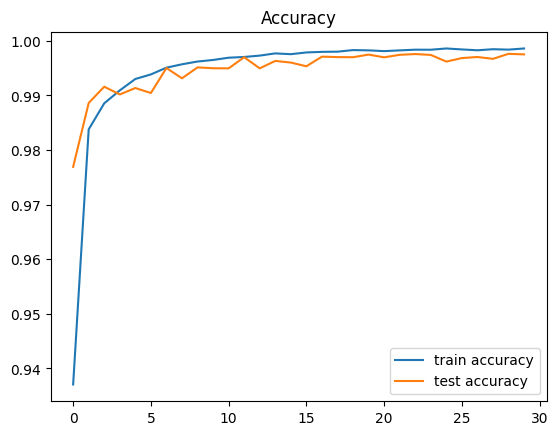

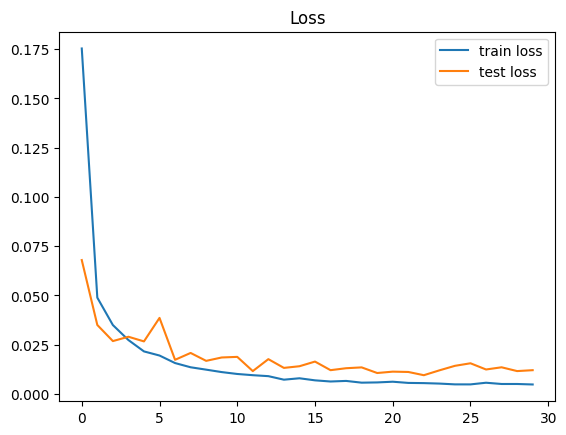

In [ ]:
# plot accuracy during training
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy') # label is actually 'validation accuracy'
plt.legend()
plt.show()

# plot loss during training
plt.title('Loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss') # label is actually 'validation accuracy'
plt.legend()
plt.show()

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir "F:/ECG_Analysis/mit-bih-arrhythmia-database-1.0.0/logs/20221220-113542"

# **Part F: Results**


## **F1: Classification Accuracy and Confusion Matrix**
The overall classification accuracy and confusion matrix generated by the follwoing code.

**Model Testing**
* a. Using **recently trained** and Saved Model after 30 Epochs.
* b. Using the **best model** saved by *'model checkpoint'* callback.

**a. Using Recently Trained Model**

In [38]:
# evaluate the model
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Training Accuracy: %.2f, Test Accuracy: %.2f' % (train_acc*100, test_acc*100))
print('Training Loss: %.2f, Test Loss: %.2f' % (train_loss*100, test_loss*100))

Training Accuracy: 99.89, Test Accuracy: 99.06
Training Loss: 0.47, Test Loss: 5.84


**b. Using the Best Model**
We saved many checkpoints of the model. Among these checkpoints we will consider the checkpoint which has the largest validation accuracy. Then copy its path and update the model weights. 

In [39]:
# model2 taken fro model_checkpoint callback
model2 = buildModel()
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Update the weights with best validation accuracy # Loads the weights
model2.load_weights(checkpoint_filepath)

In [40]:
# evaluate the best model
train_loss_cp, train_acc_cp = model2.evaluate(X_train, Y_train, verbose=0)
test_loss_cp, test_acc_cp = model2.evaluate(X_test, Y_test, verbose=0)
print('Training Accuracy: %.2f, Test Accuracy: %.2f' % (train_acc_cp*100, test_acc_cp*100))
print('Training Loss: %.2f, Test Loss: %.2f' % (train_loss_cp*100, test_loss_cp*100))

Training Accuracy: 99.87, Test Accuracy: 98.93
Training Loss: 0.51, Test Loss: 5.77


**Confusion Matrix**

In [41]:
# confusion matrix
def plotHeatMap(Y_test, Y_pred):
    con_mat = confusion_matrix(Y_test, Y_pred)
    # Normalized
    # con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]
    # con_mat_norm = np.around(con_mat_norm, decimals=2)

    # Plotting
    plt.figure(figsize=(8, 8))
    seaborn.heatmap(con_mat, annot=True, square=True, fmt='.20g', cmap='Greens')
    plt.ylim(0, 5)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

684/684 [==============================] - 5s 7ms/step


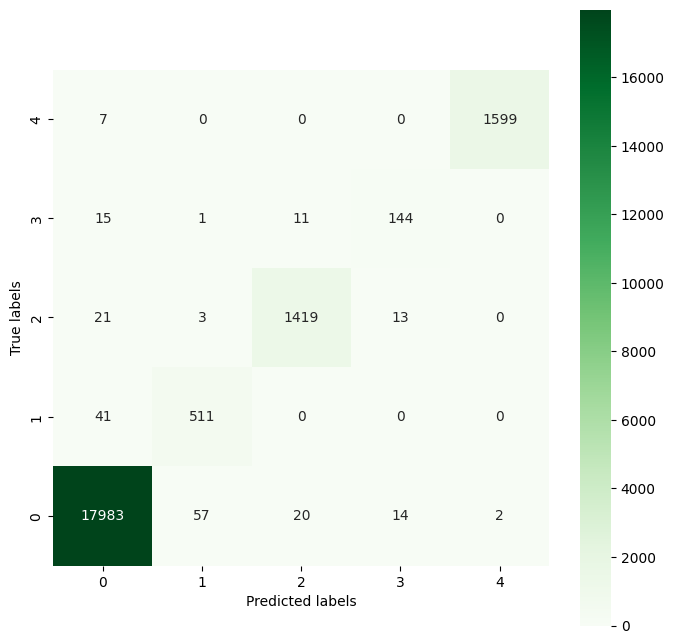

In [48]:
# predict
Y_pred = np.argmax(model.predict(X_test), axis=-1)

plotHeatMap(Y_test, Y_pred)

## **F2: Per Class Performance**
Calculating per class Sensitivity, Specificity, Accuracy and F1 score. 

In [49]:
# Per class accuracy printing function
def _report(TN, FP, FN, TP):
    TPR = TP/(TP+FN) if (TP+FN)!=0 else 0
    TNR = TN/(TN+FP) if (TN+FP)!=0 else 0
    PPV = TP/(TP+FP) if (TP+FP)!=0 else 0
    '''
    report = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
              'TPR': TPR, 'Recall': TPR, 'Sensitivity': TPR,
              'TNR' : TNR, 'Specificity': TNR,
              'FPR': FP/(FP+TN) if (FP+TN)!=0 else 0,
              'FNR': FN/(FN+TP) if (FN+TP)!=0 else 0,
              'PPV': PPV, 'Precision': PPV,
              'F1 Score': 2*(PPV*TPR)/(PPV+TPR),
              'Per Class Accuracy': (TP+TN)/(TP+FP+FN+TN)
             }'''

    report = {'Sensitivity (%)': TPR*100,
              'Specificity (%)': TNR*100,
              'F1 Score (%)': 2*100*(PPV*TPR)/(PPV+TPR),
              'Per Class Accuracy (%)': (TP+TN)*100/(TP+FP+FN+TN)
             }
    return report

def multi_classification_report(y_test, y_pred, labels=None, encoded_labels=True, as_frame=False):
    """
    Args:
        y_test (ndarray)
        y_pred (ndarray)
        labels (list)
        encoded_labels (bool): Need to be False if labels are not one hot encoded
        as_fram (bool): If True, return type will be DataFrame
        
    Return:
        report (dict)
    """
    
    import numpy as np
    import pandas as pd
    from sklearn.metrics import multilabel_confusion_matrix
    
    conf_labels = None if encoded_labels else labels
    
    conf_mat = multilabel_confusion_matrix(y_test, y_pred, labels=conf_labels)
    report = dict()
    if labels == None:
        counter = np.arange(len(conf_mat))
    else:
        counter = labels
        
    for i, name in enumerate(counter):
        TN, FP, FN, TP = conf_mat[i].ravel()
        report[name] = _report(TN, FP, FN, TP)
    
    if as_frame:
        return pd.DataFrame(report)
    return report

**a. Recently Trained Model**

In [51]:
# Per class performance
labels = ['N', 'S', 'V', 'F', 'Q']
Y_pred = np.argmax(model.predict(X_test), axis=-1)
multi_classification_report(Y_test, Y_pred, labels=labels, encoded_labels=True, as_frame=True)

684/684 [==============================] - 5s 8ms/step


,N,S,V,F,Q
Sensitivity (%),99.485506,92.572464,97.458791,84.210526,99.564134
Specificity (%),97.780713,99.713736,99.848076,99.875519,99.990126
F1 Score (%),99.510279,90.925267,97.660014,84.210526,99.719364
Per Class Accuracy (%),99.190339,99.533416,99.688944,99.752985,99.958831


**b. Best Model**

In [52]:
# Per class performance
labels = ['N', 'S', 'V', 'F', 'Q']
Y_pred = np.argmax(model2.predict(X_test), axis=-1)
multi_classification_report(Y_test, Y_pred, labels=labels, encoded_labels=True, as_frame=True)

684/684 [==============================] - 6s 7ms/step


,N,S,V,F,Q
Sensitivity (%),99.242089,94.202899,97.252747,88.888889,99.626401
Specificity (%),98.414795,99.633957,99.838275,99.755648,99.950629
F1 Score (%),99.453915,90.434783,97.487091,80.851064,99.502488
Per Class Accuracy (%),99.098852,99.496821,99.666072,99.670646,99.926810
